## _*LiH plot using ExactEigensolver*_

This notebook demonstrates using Qiskit Chemistry to plot graphs of the ground state energy and dipole moments of a Lithium Hydride (LiH) molecule over a range of inter-atomic distances.

This notebook populates a dictionary, which is a progammatic representation of an input file, in order to drive the Qiskit Chemistry stack. Such a dictionary can be manipulated programmatically and this is indeed the case here where we alter the molecule supplied to the driver in each loop.
    
This notebook has been written to use the PYSCF chemistry driver. See the PYSCF chemistry driver readme if you need to install the external PySCF library that this driver requires.
 

In [1]:
import numpy as np
import pylab
from qiskit_chemistry import QiskitChemistry

# Input dictionary to configure Qiskit Chemistry for the chemistry problem.
# Note: In order to allow this to run reasonably quickly it takes advantage
#       of the ability to freeze core orbitals and remove unoccupied virtual
#       orbitals to reduce the size of the problem. The result without this
#       will be more accurate but it takes rather longer to run.
qiskit_chemistry_dict = {
    'driver': {'name': 'PYSCF'},
    'PYSCF': {'atom': '', 'basis': 'sto3g'},
    'algorithm': {'name': 'ExactEigensolver'},
    'operator': {'name': 'hamiltonian', 'freeze_core': True, 'orbital_reduction': [-3, -2]},
}
molecule = 'Li .0 .0 -{0}; H .0 .0 {0}'

start = 1.25 # Start distance
by    = 0.5  # How much to increase distance by
steps = 20   # Number of steps to increase by
energies  = np.empty(steps+1)
distances = np.empty(steps+1)
dipoles   = np.empty(steps+1)

print('Processing step __', end='')
for i in range(steps+1):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    d = start + i*by/steps
    qiskit_chemistry_dict['PYSCF']['atom'] = molecule.format(d/2) 
    solver = QiskitChemistry()
    result = solver.run(qiskit_chemistry_dict)
    distances[i] = d
    energies[i] = result['energy']
    dipoles[i]  = result['total_dipole_moment']
print(' --- complete')

print('Distances: ', distances)
print('Energies:', energies)
print('Dipole moments:', dipoles)

Processing step 20 --- complete
Distances:  [1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475 1.5   1.525
 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75 ]
Energies: [-7.86021175 -7.86413664 -7.86756329 -7.87052961 -7.87307044 -7.87521786
 -7.87700149 -7.87844868 -7.87958474 -7.88043316 -7.88101572 -7.88135266
 -7.88146285 -7.88136385 -7.88107204 -7.88060273 -7.8799702  -7.87918784
 -7.87826817 -7.87722291 -7.87606307]
Dipole moments: [1.85348096 1.85204573 1.85067375 1.84935828 1.84809268 1.84687002
 1.84568265 1.84452191 1.84337791 1.84223932 1.84109328 1.83992524
 1.83871893 1.8374563  1.83611747 1.83468076 1.83312267 1.83141785
 1.82953923 1.82745794 1.82514338]


Text(0.5, 1.0, 'LiH Ground State Energy')

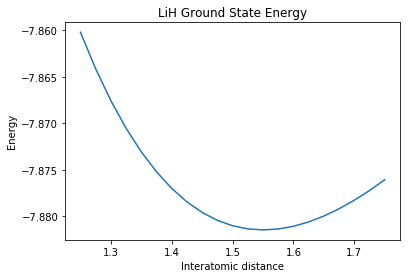

In [2]:
pylab.plot(distances, energies)
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('LiH Ground State Energy')

Text(0.5, 1.0, 'LiH Dipole Moment')

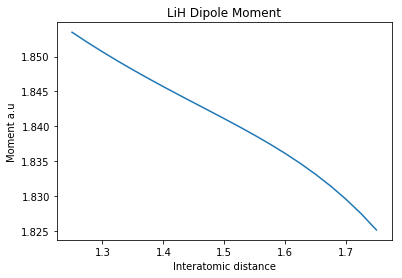

In [3]:
pylab.plot(distances, dipoles)
pylab.xlabel('Interatomic distance')
pylab.ylabel('Moment a.u')
pylab.title('LiH Dipole Moment')